In [1]:
import datetime
import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly
from plotly import graph_objects as go
import seaborn as sns

In [2]:
experiment_data = "inference_times"
experiment_name = "times_2h-runs"
experiment_id = ""
best_test_id = ""
experiment_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

create_dir = True

In [3]:
def create_directory(
    directory_path
    ):
    """
    Muller-Cleve, Simon F.; Istituto Italiano di Tecnologia - IIT; Event-driven perception in robotics - EDPR; Genova, Italy.
    """
    if os.path.exists(directory_path):
        return None
    else:
        try:
            os.makedirs(directory_path)
        except:
            # in case another machine created the path meanwhile! :(
            return None
        return directory_path

In [4]:
if create_dir:
    path_for_plots = "./plots/{}/{}".format(experiment_data,experiment_name)
    create_directory(path_for_plots)

In [5]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [8]:
axis_label_size = 12
axis_ticks_size = 10
#cbar_label_size = 16
cbar_ticks_size = 8
#legend_title_size = 'x-large'
legend_entry_size = 8

### Continuous execution

In [ ]:
with open("./times_2h-runs.txt", 'r') as f:
    inference_times = np.array([float(el.strip())*1000 for num,el in enumerate(f) if num>=5])

In [ ]:
# Statistics
mean_time = np.mean(inference_times)
median_time = np.median(inference_times)
stddev_time = np.std(inference_times)

print("Mean: {} ms".format(np.round(mean_time,2)))
print("Median: {} ms".format(np.round(median_time,2)))

print("Std. Dev.: {} ms".format(np.round(stddev_time,2)))

C:\Users\UTENTE\AppData\Local\Temp\ipykernel_29436\3068688023.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(np.arange(200,400+1,25).tolist())


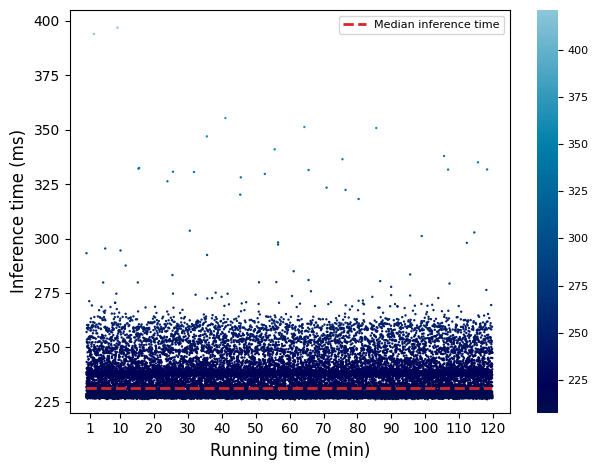

In [9]:
save_fig = False

NOW = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

#cmap = plt.get_cmap('turbo')
#print("Numero di colori: {}".format(len(cmap.colors)))
cmap = truncate_colormap(plt.get_cmap('ocean'), minval=0.3, maxval=0.85, n=100) #plt.get_cmap('winter')

exec_time = np.cumsum(inference_times)/1000/60 #range(len(inference_times))

plt.figure()
plt.scatter(exec_time,inference_times, s=0.5, c=inference_times, cmap=cmap) #"blue"
plt.plot(exec_time,median_time*np.ones(len(exec_time)),label="Median inference time",color="tab:red",linestyle="dashed",linewidth=2)
plt.xlim((-5,125))
plt.ylim((220,405))
plt.xlabel("Running time (min)", fontsize=axis_label_size)
plt.ylabel("Inference time (ms)", fontsize=axis_label_size)
plt.xticks(np.array([1]+list(np.arange(10,120+1,10))), fontsize=axis_ticks_size)
plt.yticks(np.arange(225,400+1,25),fontsize=axis_ticks_size)
plt.legend(fontsize=legend_entry_size)
cb = plt.colorbar() #ticks=np.arange(225,400+1,25).tolist()
cb.ax.set_yticklabels(np.arange(200,400+1,25).tolist()) 
cb.ax.tick_params(labelsize=cbar_ticks_size)
cb.outline.set_visible(False)
plt.tight_layout()
if save_fig:
    plt.savefig(path_for_plots + "/continuous_execution_{}.pdf".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/continuous_execution_{}.png".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/continuous_execution_{}.eps".format(NOW), dpi=300)
plt.show()

### Distribution

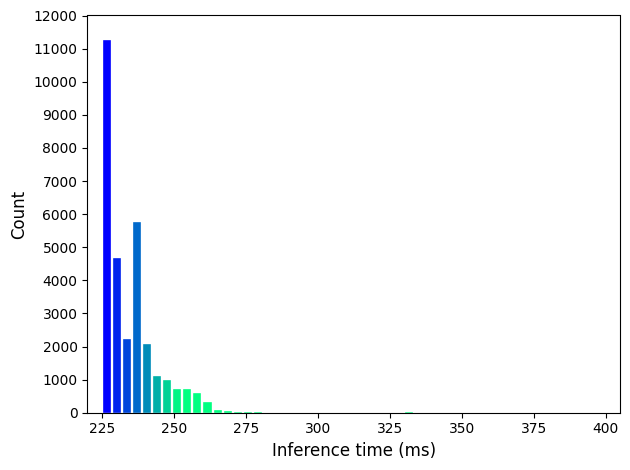

In [10]:
save_fig = False

NOW = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

cmap = plt.get_cmap('winter')
#print("Numero di colori: {}".format(len(cmap.colors)))

plt.figure()
_, bins, patches = plt.hist(inference_times, bins=50, range=(225,400), linewidth=0.25, edgecolor="white", rwidth=0.8, log=False)
for i, rect in enumerate(patches):
    rect.set_fc(cmap(i*35))
plt.xlim((220,405))
plt.xticks(np.arange(225,400+1,25),fontsize=axis_ticks_size)
plt.ylim((0,12000))
plt.yticks(np.arange(0,12000+1,1000),fontsize=axis_ticks_size)
plt.xlabel("Inference time (ms)", fontsize=axis_label_size)
plt.ylabel("Count", fontsize=axis_label_size)
plt.tight_layout()
if save_fig:
    plt.savefig(path_for_plots + "/distribution_{}.pdf".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/distribution_{}.png".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/distribution_{}.eps".format(NOW), dpi=300)
plt.show()

time_values = np.linspace(min(bins),max(bins),patches.datavalues.shape[0])
counts = patches.datavalues

df = pd.DataFrame()
df["time_values"] = time_values
df["counts"] = counts

### Workload

In [ ]:
save_fig = False

NOW = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

#cmap = plt.get_cmap('YlOrRd')
#print("Numero di colori: {}".format(len(cmap.colors)))
cmap = truncate_colormap(plt.get_cmap('YlOrRd'), minval=0.25, maxval=1.0, n=100) #plt.get_cmap('winter')

xs = np.arange(1,7200+1)
ys = np.random.rand(len(xs))

plt.figure()
plt.scatter(xs,ys, s=2, c=ys, cmap=cmap)
plt.xlim((-205,7405))
plt.ylim((-0.05,1.05))
plt.xlabel("Running time (min)", fontsize=axis_label_size)
plt.ylabel("MPU usage (%)", fontsize=axis_label_size)
plt.xticks(np.array([1*60]+list(np.arange(10*60,(120+1)*60,10*60))), np.array([1]+list(np.arange(10,120+1,10))), fontsize=axis_ticks_size)
plt.yticks(fontsize=axis_ticks_size)
# cb = plt.colorbar() #ticks=np.arange(225,400+1,25).tolist()
# #cb.ax.set_yticklabels(np.arange(200,400+1,25).tolist()) 
# cb.ax.tick_params(labelsize=cbar_ticks_size)
# cb.outline.set_visible(False)
# plt.gca().set_facecolor('w')
# plt.grid(which='both', axis='both', color=(225/255,225/255,225/255)) # 215, 215, 215
plt.tight_layout()
if save_fig:
    plt.savefig(path_for_plots + "/workload_{}.pdf".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/workload_{}.png".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/workload_{}.eps".format(NOW), dpi=300)
plt.show()

### MPU temperature

In [ ]:
with open("./temperatures_2h-runs.txt", 'r') as f:
    inference_temperatures = np.array([float(el.strip())*1000 for num,el in enumerate(f) if num>=5])

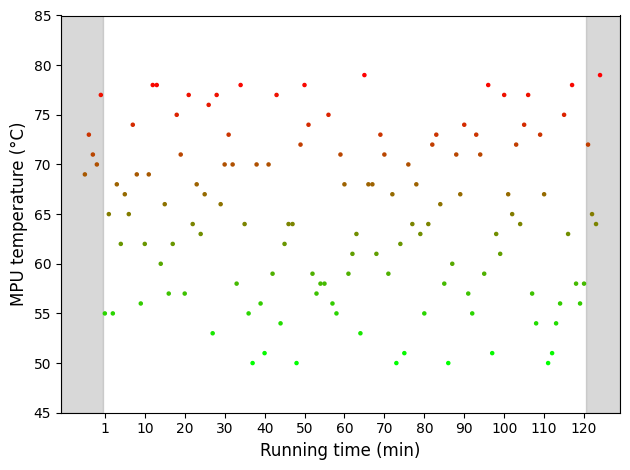

In [69]:
save_fig = False

NOW = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

#cmap = plt.get_cmap('brg-r')
#print("Numero di colori: {}".format(len(cmap.colors)))
cmap = truncate_colormap(plt.get_cmap('brg_r'), minval=0.0, maxval=0.5, n=100)

xs = np.arange(1,130+1)
ys = inference_temeperatures #np.random.randint(50, 80, size=len(xs))

xlim_min = -5
xlim_max = 135
ylim_min = 45
ylim_max = 85

plt.figure()
plt.scatter(xs,ys, s=5, c=ys, cmap=cmap)
plt.fill_between(np.array(np.arange(xlim_min,min(xs[:5])).tolist() + xs[:5].tolist() + [xs[4]+0.5]), ylim_min, ylim_max, alpha=0.3, color="grey", zorder=-1)
plt.fill_between(np.array([xs[-5]+0.5] + xs[-4:].tolist() + np.arange(max(xs[-5:]),xlim_max+1).tolist()), ylim_min, ylim_max, alpha=0.3, color="grey", zorder=-1)
plt.xlim((xlim_min,xlim_max))
plt.ylim((ylim_min,ylim_max))
plt.xlabel("Running time (min)", fontsize=axis_label_size)
plt.ylabel("MPU temperature (°C)", fontsize=axis_label_size)
plt.xticks(np.array([6]+list(np.arange(10+6,120+7,10))), np.array([1]+list(np.arange(10,120+1,10))), fontsize=axis_ticks_size)
plt.yticks(fontsize=axis_ticks_size)
# cb = plt.colorbar() #ticks=np.arange(225,400+1,25).tolist()
# #cb.ax.set_yticklabels(np.arange(200,400+1,25).tolist()) 
# cb.ax.tick_params(labelsize=cbar_ticks_size)
# cb.outline.set_visible(False)
# plt.gca().set_facecolor('w')
# plt.grid(which='both', axis='both', color=(225/255,225/255,225/255)) # 215, 215, 215
plt.tight_layout()
if save_fig:
    plt.savefig(path_for_plots + "/temperature_{}.pdf".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/temperature_{}.png".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/temperature_{}.eps".format(NOW), dpi=300)
plt.show()